# Multi Class Dog Breed classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem Statement
Identifying the breed of a dog given an image of a dog.

## 2.Data

kaggle data https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

Get our workspace ready
* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [3]:
#!unzip "drive/MyDrive/dog-breed/test.zip" -d "drive/MyDrive/dog-breed/"

In [4]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [5]:
import tensorflow_hub as hub
print(hub.__version__)

0.12.0


In [6]:
print("GPU available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


## Getting the data ready and turning them into tensors


In [7]:
import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/dog-breed/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


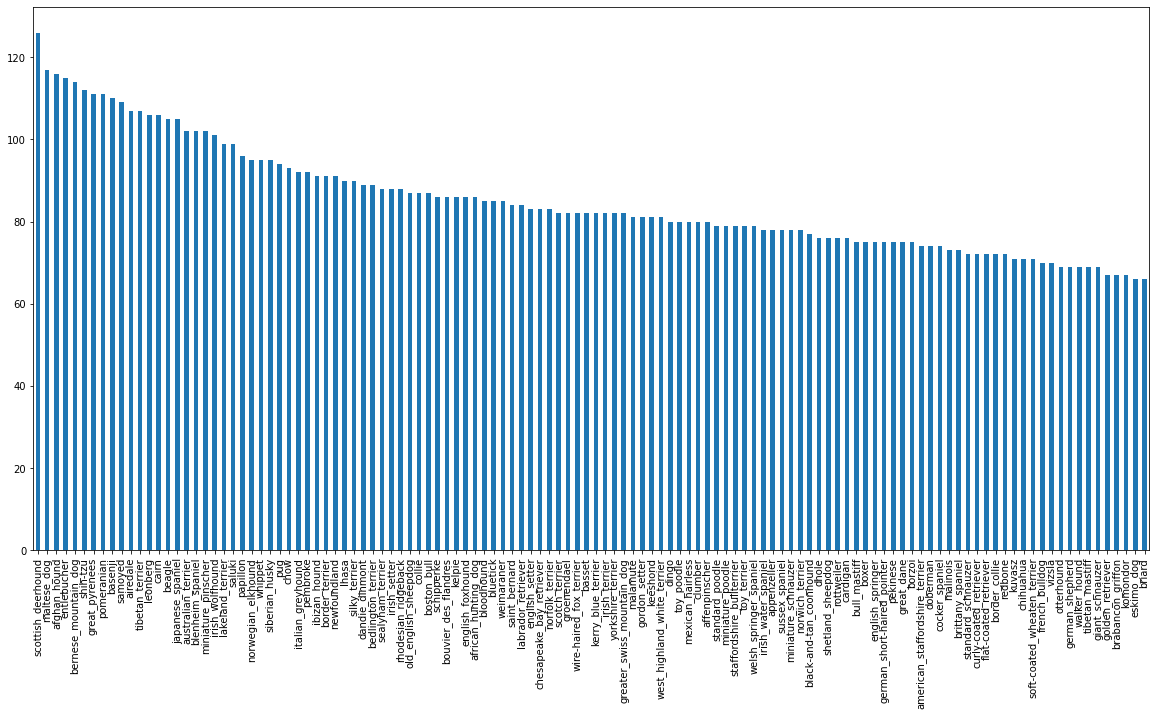

In [9]:
labels_csv['breed'].value_counts().plot.bar(figsize = (20,10))

In [10]:
labels_csv["breed"].value_counts().median()

82.0

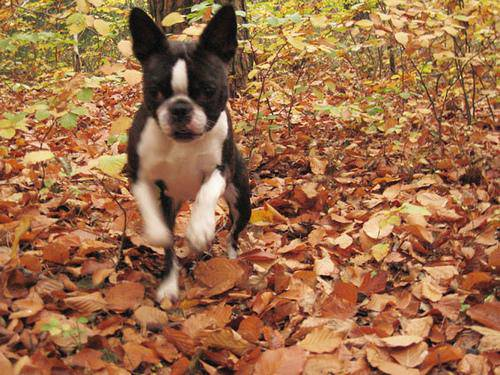

In [11]:
from IPython.display import Image
Image("drive/MyDrive/dog-breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting Images and their labels

In [12]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
# Creating pathnames from image ids
filenames = ['drive/MyDrive/dog-breed/train/' + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/dog-breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog-breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog-breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog-breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog-breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog-breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog-breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog-breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog-breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog-breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [14]:
# checking whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/MyDrive/dog-breed/train/')) == len(filenames):
  print("Filenames matches with actual number of files")
else:
  print("number of files dont match")

Filenames matches with actual number of files


In [15]:
print(len(os.listdir('drive/MyDrive/dog-breed/train')), len(filenames))

10222 10222


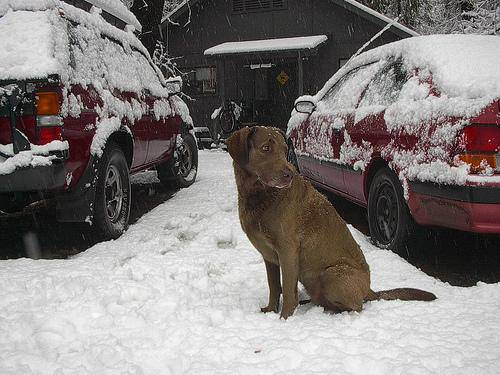

In [16]:
Image(filenames[10221])

In [17]:
labels_csv['breed'][10221]

'chesapeake_bay_retriever'

In [18]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


#### Preparing labels

In [19]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [20]:
len(labels)

10222

In [21]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [22]:
if len(labels) == len(filenames):
  print("Number of labels matches")
else:
  print("Number of labels doesnt match")

Number of labels matches


In [23]:
# Turn a single label into amn array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [24]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [25]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]

In [26]:
len(boolean_labels)
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [27]:
# Turning boolean array into integers
print(labels[0])  # original label for dog breed
print(np.where(unique_breeds == labels[0]))   #index where label occurs
print(boolean_labels[0].argmax())    #index where label occurs in boolean array
print(boolean_labels[0].astype(int))    # boolean array in int format

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [28]:
print(labels[5])
print(boolean_labels[5].astype(int))

bedlington_terrier
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our Validation Set

In [29]:
X = filenames
y = boolean_labels

starting the experiment from 1000 images

In [30]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:500}

In [31]:
# splitting the dataset into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [32]:
X_train[:5]

['drive/MyDrive/dog-breed/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/MyDrive/dog-breed/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'drive/MyDrive/dog-breed/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'drive/MyDrive/dog-breed/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'drive/MyDrive/dog-breed/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [33]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Preprocessing images - turning Images into tensors

Function to turn images to tensors
1. Take image filepath as input
2. Use Tensorflow to read the image and turn it into a variable
3. Turn the image into tensors
4. Resize the images to a standard shape
5. Return the modified image

In [34]:
# Convert image to numpy
from matplotlib.pyplot import imread
image = imread(filenames[420])
image.shape

(375, 500, 3)

In [35]:
image.max(), image.min()

(255, 0)

In [36]:
tf_image = tf.constant(image)
type(tf_image)
tf_image.shape

TensorShape([375, 500, 3])

In [37]:
# Define Image Size
IMG_SIZE = 224

def process_image(image_path,img_size = IMG_SIZE):
  """
  Takes an image file and turns the image into Tensor
  """
  # read the image file
  image = tf.io.read_file(image_path)
  # turn hr jpeg image into numerical tensor with rgb values
  image = tf.image.decode_jpeg(image, channels=3)
  # covert thecolor values from 0-255 to 0-1 values. normalizing the values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to a standard size
  image = tf.image.resize(image, size=[img_size, img_size])

  return image


## Turning our data into batches

In [38]:
# creating a slimple function to return a tuple (image, label)

def get_image_label(image_path,label):
  """
  takes and image path and the label, processes the image amnd returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [39]:
(process_image(X[5417]), tf.constant(y[5417]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.44255206, 0.52236646, 0.5837285 ],
         [0.45760432, 0.5278074 , 0.5870161 ],
         [0.48272187, 0.54900336, 0.6037853 ],
         ...,
         [0.24605976, 0.32056957, 0.37939313],
         [0.24913721, 0.3354117 , 0.39031368],
         [0.26128837, 0.34756288, 0.40246487]],
 
        [[0.4356668 , 0.5339336 , 0.56936276],
         [0.44929975, 0.5417004 , 0.5756991 ],
         [0.46136206, 0.54532564, 0.5704407 ],
         ...,
         [0.2364496 , 0.3109594 , 0.36978292],
         [0.22491248, 0.311187  , 0.36608896],
         [0.2212185 , 0.307493  , 0.36239496]],
 
        [[0.46722692, 0.5838761 , 0.57988447],
         [0.45575607, 0.5635642 , 0.5634942 ],
         [0.48846292, 0.5894258 , 0.58251053],
         ...,
         [0.23935576, 0.31386554, 0.3726891 ],
         [0.22871776, 0.31499225, 0.36989424],
         [0.22737968, 0.31365418, 0.36855614]],
 
        ...,
 
        [[0.47326902, 0.53730845

## Function to turn data into batches

In [40]:
# Define the batch size 
BATCH_SIZE = 32

# Function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and labels (y) pairs.
  Shuffles the data if its training data and deoesnt shuffle if its validation data.
  Also accepts test data as input()
  """

  # if the data is test dataset, no labels would be present
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))       # only filepath aand no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is validation dataset, no need to shuffle
  elif valid_data:
    print("Creatin validation data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                              tf.constant(y)))  # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # if data is training dataset, shuffling is required
  else:
    print("Creating training data batchs....")

    # turn filepaths and labels to tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                               tf.constant(y))) #labels

    # Shuffling pathnames and labels before mapping the data to batches as shuffling is faster 
    data = data.shuffle(buffer_size=len(X))

    # Create (image,label) tuples
    data = data.map(get_image_label)

    # turn the training dataset to batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [41]:
# Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batchs....
Creatin validation data batches....


In [42]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches

In [43]:
import matplotlib.pyplot as plt

# function for displaying images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images along with their labels from a data batch
  """
  plt.figure(figsize=(20,20))

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")
  

In [44]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [45]:
train_images, train_labels = next(train_data.as_numpy_iterator())

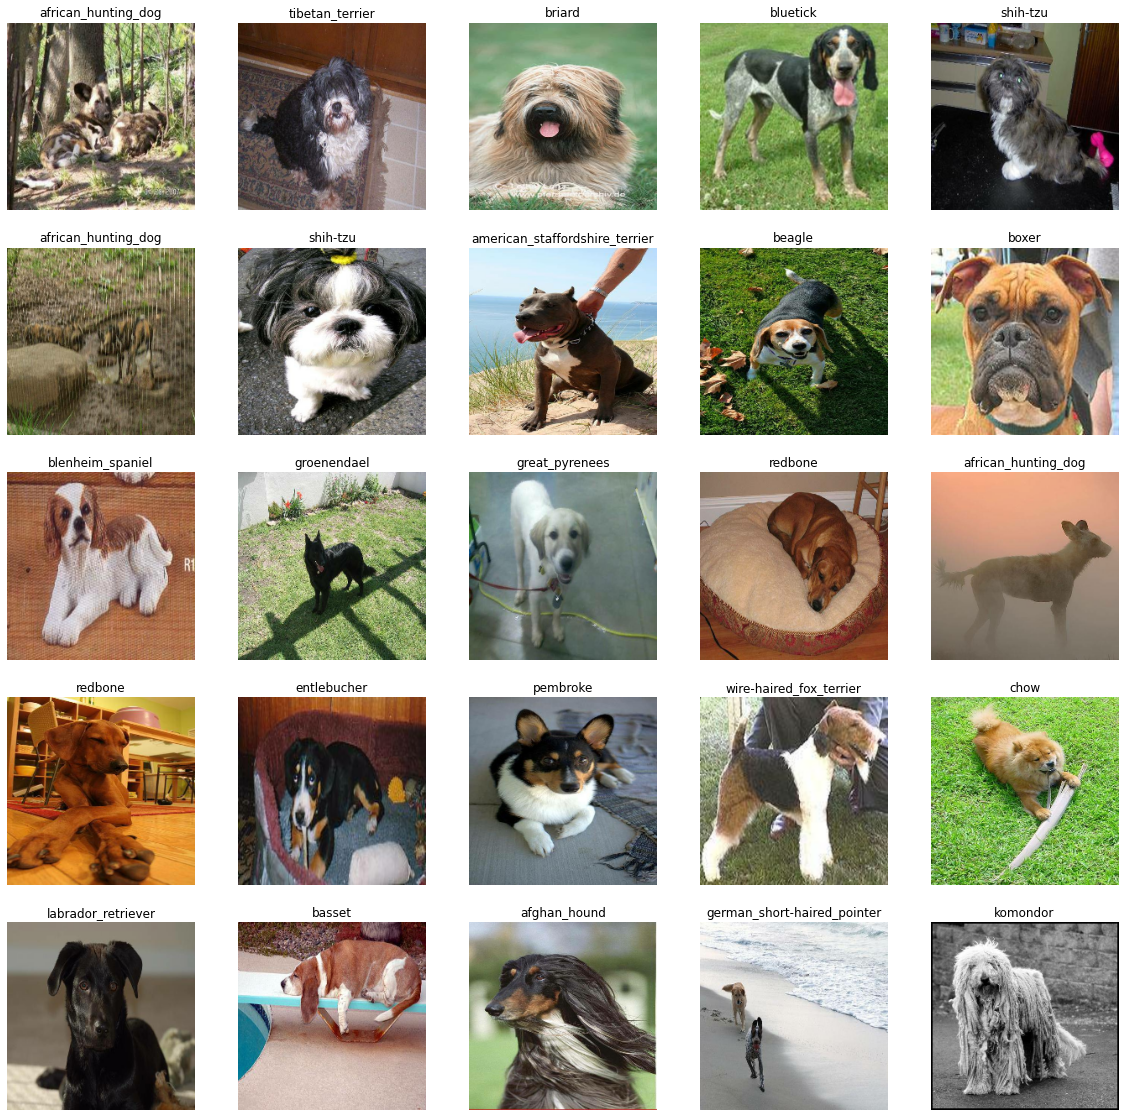

In [46]:
show_25_images(train_images, train_labels)

In [47]:
type(train_images)

numpy.ndarray

In [50]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]   # batch, height, width, colour channels
OUTPUT_SHAPE = len(unique_breeds)

# setup model url from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
Returns the model.

In [56]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("bulding the model")

  # setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")  # Layer2 
  ])

  # compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # build the model
  model.build(INPUT_SHAPE)

  return model

In [57]:
model = create_model()
model.summary()

bulding the model


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
